In [2]:
# imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
aggregate_df = pd.read_csv('cluster_labels_k6.csv')
print(aggregate_df.describe())
print(aggregate_df.info())

       Customer Age     Quantity        Revenue           Cost   Unit Price  \
count   1627.000000  1627.000000    1627.000000    1627.000000  1627.000000   
mean      39.094653    42.913337   13733.605409   12343.561156   386.363799   
std       14.422193    66.440296   21442.155279   20002.564311   236.872214   
min       17.000000     1.000000      10.000000      10.000000     5.000000   
25%       27.000000     7.000000    1808.000000    1421.500000   228.180208   
50%       37.000000    17.000000    5476.000000    4660.000000   355.488889   
75%       49.000000    44.000000   15706.000000   13429.500000   495.083333   
max       87.000000   497.000000  155374.000000  146692.000000  1823.000000   

         Unit Cost  Profit Margin      Cluster  
count  1627.000000    1627.000000  1627.000000  
mean    335.425565       0.152133     2.495390  
std     216.404736       0.108917     1.913041  
min       5.000000      -0.567712     0.000000  
25%     194.917500       0.091471     0.000

In [4]:
#hot encoding categorical variables
aggregate_df_encoded = pd.get_dummies(aggregate_df, columns=['Customer Gender', 'Cluster', 'Country', 'State'], drop_first=True)
aggregate_df_encoded

ag_df = pd.get_dummies(aggregate_df, columns=['key', 'Customer Gender', 'Cluster', 'Country'], drop_first=True)
print(aggregate_df_encoded.describe())
print(aggregate_df_encoded.info())

       Customer Age     Quantity        Revenue           Cost   Unit Price  \
count   1627.000000  1627.000000    1627.000000    1627.000000  1627.000000   
mean      39.094653    42.913337   13733.605409   12343.561156   386.363799   
std       14.422193    66.440296   21442.155279   20002.564311   236.872214   
min       17.000000     1.000000      10.000000      10.000000     5.000000   
25%       27.000000     7.000000    1808.000000    1421.500000   228.180208   
50%       37.000000    17.000000    5476.000000    4660.000000   355.488889   
75%       49.000000    44.000000   15706.000000   13429.500000   495.083333   
max       87.000000   497.000000  155374.000000  146692.000000  1823.000000   

         Unit Cost  Profit Margin  
count  1627.000000    1627.000000  
mean    335.425565       0.152133  
std     216.404736       0.108917  
min       5.000000      -0.567712  
25%     194.917500       0.091471  
50%     307.466000       0.136271  
75%     429.586250       0.246430  


In [5]:
# Step 1: Prepare the data
# Selecting features and target variable
X = aggregate_df_encoded[['Customer Age', 'Quantity', 'Revenue', 'Cost', 'Unit Price', 'Unit Cost', 'Profit Margin']]
y = aggregate_df['Cluster']  # Assuming 'Revenue' is the target variable

# Step 2: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train the model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Step 4: Evaluate the model
y_pred = rf_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9539877300613497
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.92      0.94        78
           1       0.91      1.00      0.95        10
           2       0.98      0.98      0.98        95
           3       0.97      0.97      0.97        32
           4       0.93      0.87      0.90        15
           5       0.93      0.96      0.94        96

    accuracy                           0.95       326
   macro avg       0.95      0.95      0.95       326
weighted avg       0.95      0.95      0.95       326



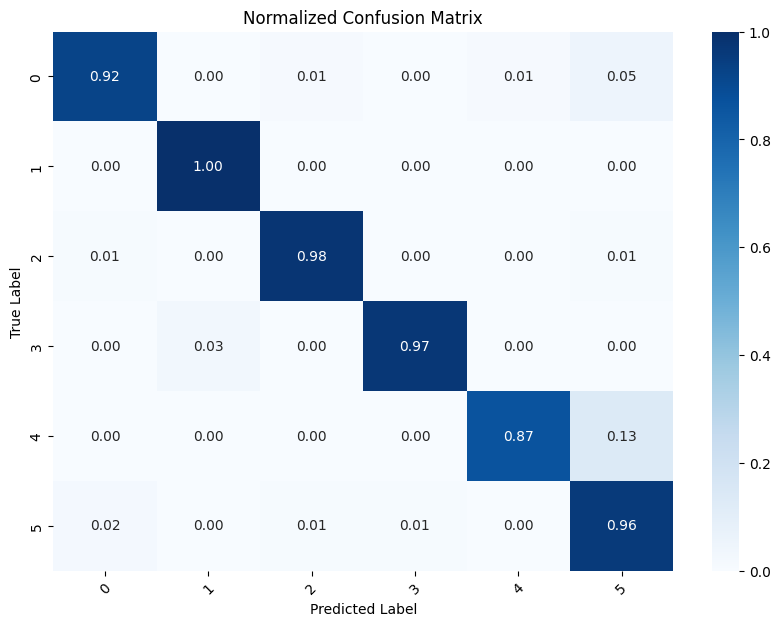

In [6]:
#visualize the classification report
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Normalize the confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
# Get the unique labels from the original target variable
unique_labels = aggregate_df['Cluster'].unique()
unique_labels.sort()

# Create a heatmap with proper labels
plt.figure(figsize=(10, 7))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', 
            xticklabels=unique_labels, yticklabels=unique_labels)
plt.title('Normalized Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(rotation=45)
plt.show()

/var/folders/x_/_l4rp9ln2lx_450s4hxz6rd40000gn/T/ipykernel_27840/3215735308.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')


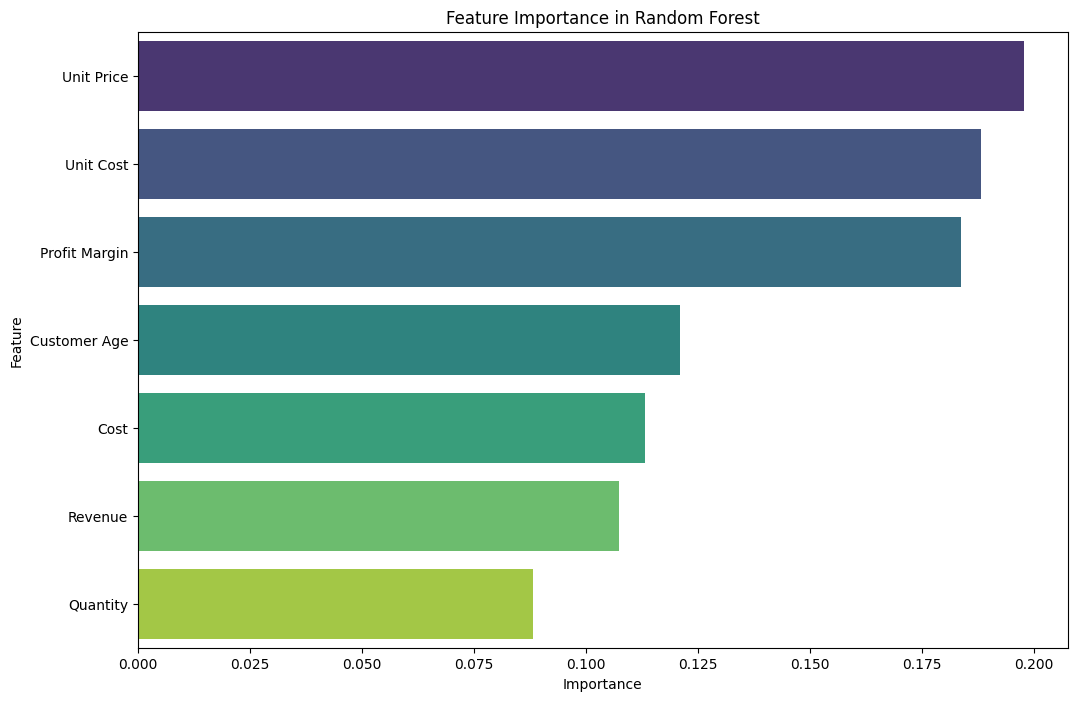

In [62]:
# Extract feature importance
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')
plt.title('Feature Importance in Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [63]:
aggregate_df_encoded.columns

Index(['key', 'Customer Age', 'Quantity', 'Revenue', 'Cost', 'Unit Price',
       'Unit Cost', 'Profit Margin', 'Customer Gender_M', 'Cluster_1',
       'Cluster_2', 'Cluster_3', 'Cluster_4', 'Cluster_5', 'Country_Germany',
       'Country_United Kingdom', 'Country_United States', 'State_Arizona',
       'State_Bayern', 'State_Brandenburg', 'State_California',
       'State_Charente-Maritime', 'State_England', 'State_Essonne',
       'State_Florida', 'State_Garonne (Haute)', 'State_Georgia',
       'State_Hamburg', 'State_Hauts de Seine', 'State_Hessen',
       'State_Illinois', 'State_Kentucky', 'State_Loir et Cher',
       'State_Loiret', 'State_Massachusetts', 'State_Minnesota',
       'State_Mississippi', 'State_Missouri', 'State_Montana', 'State_Moselle',
       'State_New York', 'State_Nord', 'State_Nordrhein-Westfalen',
       'State_North Carolina', 'State_Ohio', 'State_Oregon',
       'State_Pas de Calais', 'State_Saarland', 'State_Seine (Paris)',
       'State_Seine Saint Den

In [64]:
#Another example of RANDOM FOREST
X2 = aggregate_df_encoded[['Customer Gender_M', 'Customer Age', 'Revenue', 'Cost', 'Unit Price', 'Profit Margin']]
y2 = aggregate_df['Cluster'] 

# Step 2: Split the data
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Step 3: Train the model
rf_model2 = RandomForestClassifier(random_state=42)
rf_model2.fit(X2_train, y2_train)

# Step 4: Evaluate the model
y2_pred = rf_model2.predict(X2_test)
print("Accuracy:", accuracy_score(y2_test, y2_pred))
print("Classification Report:\n", classification_report(y2_test, y2_pred))


Accuracy: 0.9478527607361963
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95        78
           1       0.91      1.00      0.95        10
           2       0.97      0.97      0.97        95
           3       0.94      0.97      0.95        32
           4       0.93      0.87      0.90        15
           5       0.94      0.93      0.93        96

    accuracy                           0.95       326
   macro avg       0.94      0.95      0.94       326
weighted avg       0.95      0.95      0.95       326



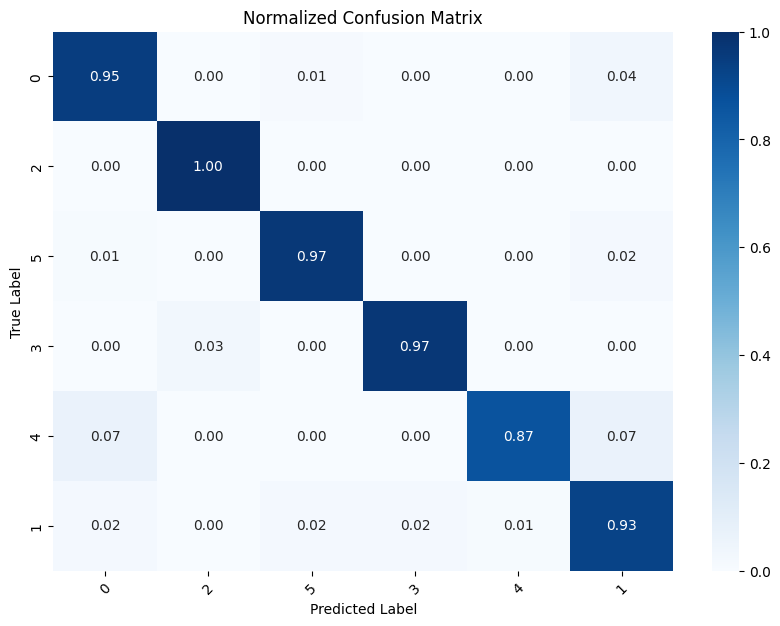

In [65]:
#visualize the classification report
# Create a confusion matrix
cm2 = confusion_matrix(y2_test, y2_pred)
# Normalize the confusion matrix
cm2_normalized = cm2.astype('float') / cm2.sum(axis=1)[:, np.newaxis]
# Get the unique labels from the original target variable
unique_labels2 = aggregate_df['Cluster'].unique()
# Create a heatmap with proper labels
plt.figure(figsize=(10, 7))
sns.heatmap(cm2_normalized, annot=True, fmt='.2f', cmap='Blues', 
            xticklabels=unique_labels2, yticklabels=unique_labels2)
plt.title('Normalized Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(rotation=45)
plt.show()

/var/folders/x_/_l4rp9ln2lx_450s4hxz6rd40000gn/T/ipykernel_27840/849685347.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances2, palette='viridis')


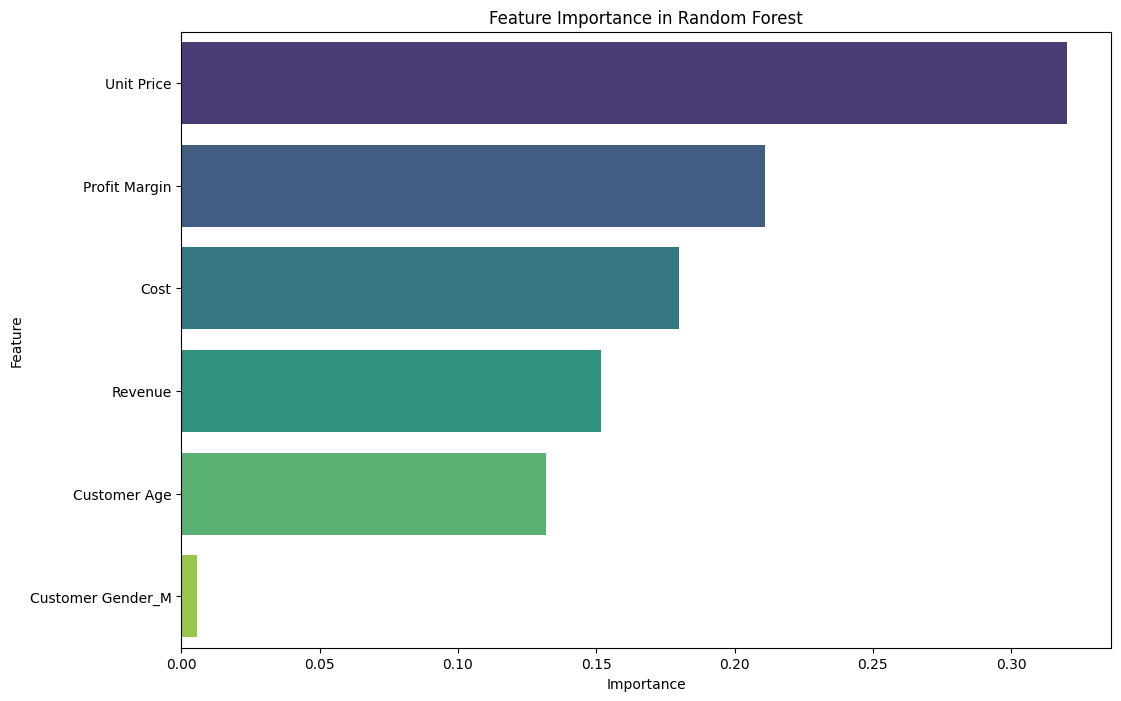

In [66]:
#bar graph of feature importance
# Extract feature importance
feature_importances2 = pd.DataFrame({
    'Feature': X2.columns,
    'Importance': rf_model2.feature_importances_
}).sort_values(by='Importance', ascending=False)
# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances2, palette='viridis')
plt.title('Feature Importance in Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [67]:
print(aggregate_df_encoded.columns)
print(aggregate_df.columns)

Index(['key', 'Customer Age', 'Quantity', 'Revenue', 'Cost', 'Unit Price',
       'Unit Cost', 'Profit Margin', 'Customer Gender_M', 'Cluster_1',
       'Cluster_2', 'Cluster_3', 'Cluster_4', 'Cluster_5', 'Country_Germany',
       'Country_United Kingdom', 'Country_United States', 'State_Arizona',
       'State_Bayern', 'State_Brandenburg', 'State_California',
       'State_Charente-Maritime', 'State_England', 'State_Essonne',
       'State_Florida', 'State_Garonne (Haute)', 'State_Georgia',
       'State_Hamburg', 'State_Hauts de Seine', 'State_Hessen',
       'State_Illinois', 'State_Kentucky', 'State_Loir et Cher',
       'State_Loiret', 'State_Massachusetts', 'State_Minnesota',
       'State_Mississippi', 'State_Missouri', 'State_Montana', 'State_Moselle',
       'State_New York', 'State_Nord', 'State_Nordrhein-Westfalen',
       'State_North Carolina', 'State_Ohio', 'State_Oregon',
       'State_Pas de Calais', 'State_Saarland', 'State_Seine (Paris)',
       'State_Seine Saint Den

In [72]:
#comparing models with rand_forest:
safe1 = pd.concat([aggregate_df[['Customer Age']], aggregate_df_encoded[['Customer Gender_M']]], axis=1)
X2 = pd.concat([safe1, aggregate_df_encoded[['State_Arizona', 'State_Bayern',
       'State_Brandenburg', 'State_California', 'State_Charente-Maritime',
       'State_England', 'State_Essonne', 'State_Florida',
       'State_Garonne (Haute)', 'State_Georgia', 'State_Hamburg',
       'State_Hauts de Seine', 'State_Hessen', 'State_Illinois',
       'State_Kentucky', 'State_Loir et Cher', 'State_Loiret',
       'State_Massachusetts', 'State_Minnesota', 'State_Mississippi',
       'State_Missouri', 'State_Montana', 'State_Moselle', 'State_New York',
       'State_Nord', 'State_Nordrhein-Westfalen', 'State_North Carolina',
       'State_Ohio', 'State_Oregon', 'State_Pas de Calais', 'State_Saarland',
       'State_Seine (Paris)', 'State_Seine Saint Denis',
       'State_Seine et Marne', 'State_Somme', 'State_South Carolina',
       'State_Texas', 'State_Utah',
       'State_Virginia', 'State_Washington', 'State_Wyoming', 'State_Yveline']]], axis=1)

y2 = aggregate_df['Cluster']  # Assuming 'Revenue' is the target variable
# Step 2: Split the data
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)
# Step 3: Train the model
rf_model2 = RandomForestClassifier(random_state=42)
# Handle missing values in X2
X2 = X2.fillna(0)  # Replace NaN values with 0 (or use another strategy like mean or median)

# Train the model
rf_model2.fit(X2_train, y2_train)
# Step 4: Evaluate the model
y2_pred = rf_model2.predict(X2_test)
print("Accuracy:", accuracy_score(y2_test, y2_pred))
print("Classification Report:\n", classification_report(y2_test, y2_pred))
#visualize the classification report

Accuracy: 0.5153374233128835
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.67      0.63        78
           1       0.70      0.70      0.70        10
           2       0.49      0.45      0.47        95
           3       0.67      0.69      0.68        32
           4       0.12      0.13      0.12        15
           5       0.45      0.44      0.44        96

    accuracy                           0.52       326
   macro avg       0.51      0.51      0.51       326
weighted avg       0.51      0.52      0.51       326



Feature ranking:
1. feature 0 (0.643391)
2. feature 1 (0.045619)
3. feature 5 (0.041783)
4. feature 7 (0.028245)
5. feature 41 (0.025615)
6. feature 32 (0.018517)
7. feature 3 (0.018371)
8. feature 27 (0.017534)
9. feature 12 (0.016181)
10. feature 14 (0.016005)
11. feature 30 (0.011824)
12. feature 26 (0.009349)
13. feature 34 (0.008802)
14. feature 4 (0.008678)
15. feature 43 (0.008513)
16. feature 33 (0.008210)
17. feature 13 (0.007950)
18. feature 35 (0.007591)
19. feature 8 (0.007318)
20. feature 24 (0.006349)
21. feature 18 (0.005888)
22. feature 36 (0.005228)
23. feature 17 (0.005223)
24. feature 10 (0.004949)
25. feature 6 (0.004755)
26. feature 31 (0.004392)
27. feature 29 (0.001364)
28. feature 2 (0.001261)
29. feature 19 (0.001121)
30. feature 11 (0.001116)
31. feature 37 (0.000970)
32. feature 9 (0.000855)
33. feature 16 (0.000849)
34. feature 38 (0.000828)
35. feature 25 (0.000828)
36. feature 39 (0.000827)
37. feature 20 (0.000807)
38. feature 15 (0.000718)
39. feature 42

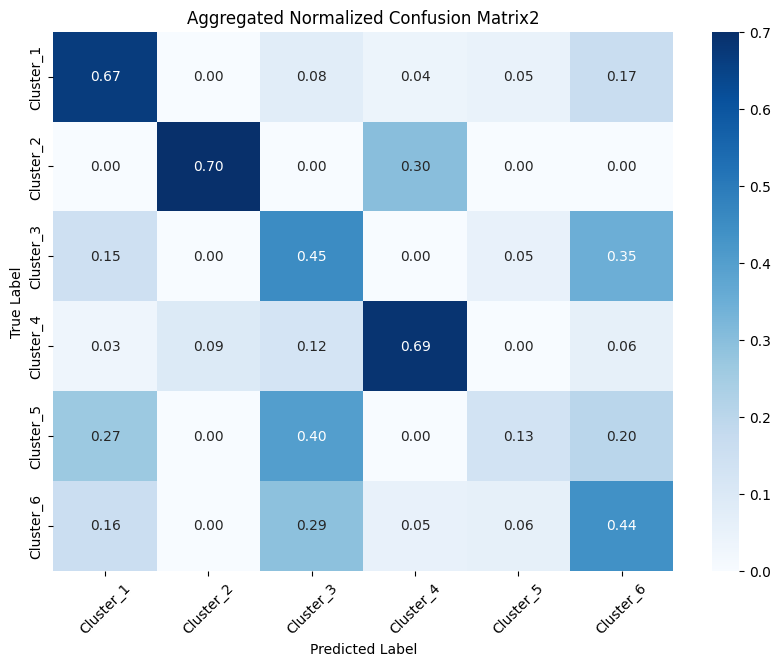

In [80]:
#Feature Importance
importances = rf_model2.feature_importances_
indices = np.argsort(importances)[::-1]
# Print the feature ranking
print("Feature ranking:")
for f in range(X2.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

#make a confusion matrix
cm2 = confusion_matrix(y2_test, y2_pred)
# Normalize the confusion matrix
cm2_normalized = cm2.astype('float') / cm2.sum(axis=1)[:, np.newaxis]
# Get the unique labels from the original target variable
unique_labels2 = ['Cluster_1', 'Cluster_2', 'Cluster_3', 'Cluster_4', 'Cluster_5', 'Cluster_6']
# unique_labels2 = aggregate_df['Cluster'].unique()
# Create a heatmap with proper labels
plt.figure(figsize=(10, 7))
sns.heatmap(cm2_normalized, annot=True, fmt='.2f', cmap='Blues', 
            xticklabels=unique_labels2, yticklabels=unique_labels2)
plt.title('Aggregated Normalized Confusion Matrix2')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(rotation=45)
plt.show()
